C:\Users\hemli\AppData\Local\Temp\ipykernel_10724\1764205395.py:105: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim( -7.5 , 7,5 )


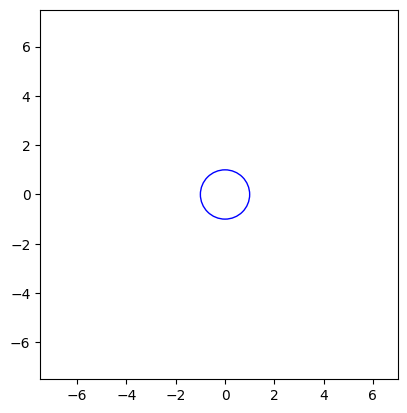

In [35]:
class Shapes:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    
    @property
    def area(self):
        return self._area
    
    @property
    def circumference(self):
        return self._circumference
    
    @property
    def volume(self):
        return self._volume
    

    def __repr__(self):
        return f"Shapes(x={self.x}, y={self.y})"

    def __str__(self):
        return f"Shapes(x={self.x}, y={self.y})"

    def __eq__(self, obj):
        return type(self)  == type(obj)
    
    def __le__(self, object):
        return f"Area:{self.area <= object.area}. Circumferance:{self.circumference <= object.circumference}"

    def __lt__(self, object):
        return f"Area:{self.area < object.area}. Circumferance:{self.circumference < object.circumference}"


    def __gt__(self, object):
        return f"Area:{self.area > object.area}. Circumferance:{self.circumference > object.circumference}"

    def __ge__(self, object):
        return f"Area:{self.area >= object.area}. Circumferance:{self.circumference >= object.circumference}"

    def translate(self, x, y):
        self.x = x
        self.y = y

    def is_inside(self, x, y):

        object_x = self.x
        object_y = self.y

        if isinstance(self, Circle):
            r = self.radius

            east = object_x + r
            west = object_x - r
            north = object_y + r
            south = object_y - r
            
            return west < x < east and south < y < north
        
        elif isinstance(self, Rectangle):
            s = self.side/2
            s2 = self.side2/2

            east = object_x + s2
            west = object_x - s2
            north = object_y + s
            south = object_y - s
            
            return west < x < east and south < y < north
        
        elif isinstance(self, Sphere):
            pass
        elif isinstance(self, Cube):
            pass

    def draw_figure(self):
        import matplotlib.pyplot as plt
        import matplotlib.patches as patches

 
        if isinstance(self, Circle):
            figure, axes = plt.subplots()
            Drawing_uncolored_circle = plt.Circle( (self.x, self.y),
                                                self.radius,
                                                fill = False,
                                                 color='blue' )
    
            axes.set_aspect( 1 )
            axes.add_artist( Drawing_uncolored_circle )


        if isinstance(self, Rectangle):
            fig, ax = plt.subplots()

            rectangle = patches.Rectangle((self.x, self.y), 
                                          self.side2, self.side, 
                                          fill=False, 
                                          color='blue', 
                                          linewidth=2)
            ax.add_patch(rectangle)


        plt.xlim( -7.5 , 7,5 )
        plt.ylim( -7.5 , 7.5 )
        plt.show()

class Rectangle(Shapes):

    def __init__(self, x, y, side=None, side2=None, area=None, circumference=None):
        super().__init__(x, y)


        self.side = side
        self.side2 = side2
        self._area = side*side2
        self._circumference = 2 * (side + side2)


    def is_square(self):
        return self.side==self.side2

    def __repr__(self):
        return f"Rectangle(x={self.x}, y={self.y}, side={self.side}, side2={self.side2}, area={self.area}, circumference={self.circumference})"

    def __str__(self):
        return f"Rectangle(x={self.x}, y={self.y}, side={self.side}, side2={self.side2}, area={self.area}, circumference={self.circumference})"



class Cube(Rectangle):
    
    def __init__(self, x, y, z, side=None, volume=None):
        super().__init__(x, y, z, side)


        self.z = z
        self.side = side
        self._volume = pow(side,3)


    def __repr__(self):
        return f"Cube(x={self.x}, y={self.y}, z={self.z}, side={self.side}, volume={self.volume})"

    def __str__(self):
        return f"Cube(x={self.x}, y={self.y}, z={self.z}, side={self.side}, volume={self.volume})"



class Circle(Shapes):
    
    import math
    pi = math.pi

    def __init__(self, x, y, radius=None, area=None, circumference=None):
        super().__init__(x, y)


        self.radius = radius
        self._area = self.pi * pow(radius, 2)
        self._circumference = 2 * self.pi * radius


    def is_unit_circle(self):
        return self.radius == 1

    def __repr__(self):
        return f"Circle(x={self.x}, y={self.y}, radius={self.radius}, area={self.area}, circumference={self.circumference})"

    def __str__(self):
        return f"Circle(x={self.x}, y={self.y}, radius={self.radius}, area={self.area}, circumference={self.circumference})"



class Sphere(Circle):

    def __init__(self, x, y, z, radius=None, volume=None):
        super().__init__(x, y, z, radius)


        self.z = z
        self.radius = radius
        self._volume = (4/3) * self.pi * pow(radius, 3)


    def __repr__(self):
        return f"Sphere(x={self.x}, y={self.y}, z={self.z}, radius={self.radius}, volume={self.volume})"

    def __str__(self):
        return f"Sphere(x={self.x}, y={self.y}, z={self.z}, radius={self.radius}, volume={self.volume})"


#############################################


a = Rectangle(3,2.5, side=3, side2=4)
b = Circle(0,0, radius=1)
c = Cube(1,2,3, side=7)
d = Sphere(1,2,3, radius=5)
aa = Rectangle(2,3, side=2, side2=3)
bb = Circle(1,2, radius=4)

#a == aa

#type(a)



b.draw_figure()

